## M3 - W4 Assignment: Applying EDA to Your Data

In [35]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_excel("/Users/apple/Desktop/amsterdam_tech/data_sets/titanic/Sample - Superstore.xls")
df_shape=df.shape
print(f'The data set has been loaded and it has {df_shape[0]} rows and {df_shape[1]} columns')
print(f'The titles of the columns are \n {df.columns}')

The data set has been loaded and it has 9994 rows and 21 columns
The titles of the columns are 
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


#### Now lets example the head of the dataframe to see what our data is like

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Lets check type of varibles in each column to see if there are any wrong data types assigned

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

#### The type of the columns seem to be fine. lets now check for NaN or null values.

In [13]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### There are no null values in our data. The data seems to be clean. Now lets check for duplicates in our data

In [14]:
df.duplicated().sum()

0

#### There are no duplicated values either. Now lets continue to explore our dataset

#### Lets check the summary statistics of the dataset

In [28]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


#### There is a negative value on minimum of Profit. lets investigate this a little further.

In [33]:
df[df['Profit']<0].shape

(1871, 21)

#### Initially It was suspected that there is  error on some of the values of profit but, since there are 1871 negative values, this shows the loss on those transactions

#### The maximum for sales value is much larger than 3x the IQR. lets investigate this

In [48]:
quan_75=df['Sales'].quantile(0.75)
quan_25=df['Sales'].quantile(0.25)
IQR=quan_75-quan_25
upper=quan_75+(1.5*IQR)
lower=quan_25-(1.5*IQR)
outliers=df[(df['Sales']>upper) | (df['Sales']<lower)]
#outliers=df[df['Sales']>3*IQR]
print (f'there are {outliers.shape[0]} outliers which make upto {outliers.shape[0]*100/df.shape[0]} percent of the total dataset')

there are 1167 outliers which make upto 11.677006203722234 percent of the total dataset


#### In specific cases the sales value can get very high. If it was less than 5 percent than we would have removed it. But since it is more than 5 percent, we will keep it in our dataset.

#### Lets create a correlation matrix

<Axes: >

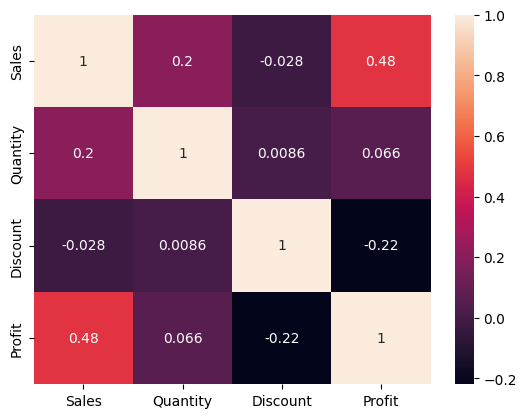

In [69]:
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(),annot=True)

#### There is a mildly strong relationship between Profit and Sales. Which seems to be justified, since sale value may increase the profit.

<Axes: xlabel='Sales', ylabel='Profit'>

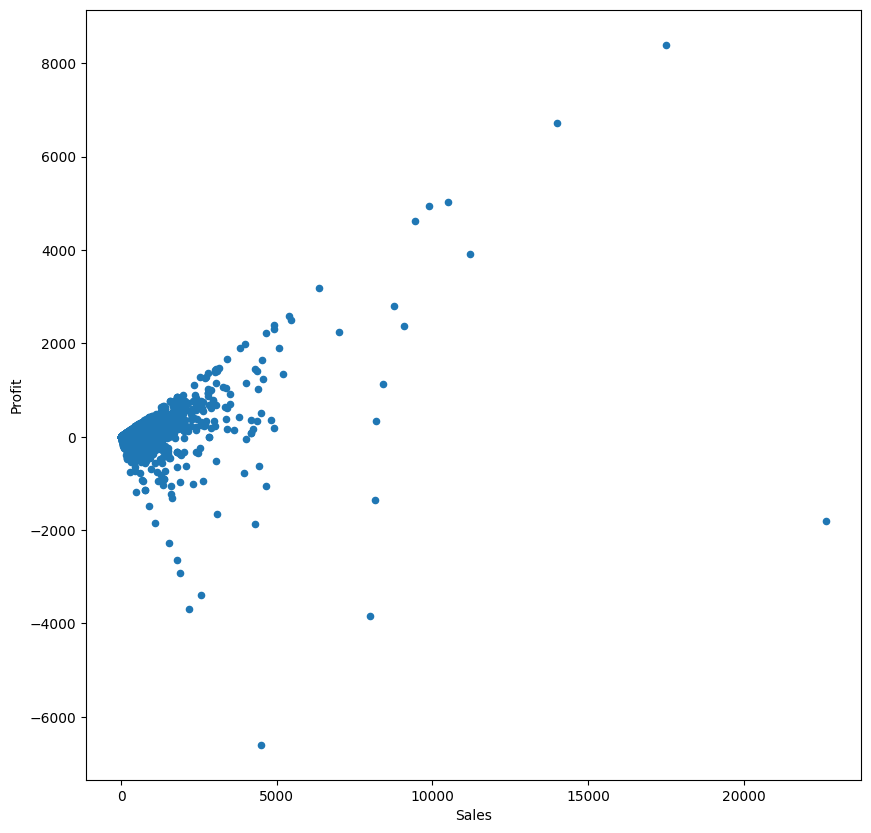

In [77]:
df[['Sales','Profit']].plot(kind='scatter',x='Sales',y='Profit',figsize=(10,10))

#### Lets looks for which categories are most profitable categories and sub-categories

In [92]:
df.groupby(['Category','Sub-Category']).Profit.mean()

Category         Sub-Category
Furniture        Bookcases       -15.230509
                 Chairs           43.095894
                 Furnishings      13.645918
                 Tables          -55.565771
Office Supplies  Appliances       38.922758
                 Art               8.200737
                 Binders          19.843574
                 Envelopes        27.418019
                 Fasteners         4.375660
                 Labels           15.236962
                 Paper            24.856620
                 Storage          25.152277
                 Supplies         -6.258418
Technology       Accessories      54.111788
                 Copiers         817.909190
                 Machines         29.432669
                 Phones           50.073938
Name: Profit, dtype: float64

#### These are most profitable products

In [96]:
df.groupby(['Category','Sub-Category','Product Name']).Profit.mean().sort_values(ascending=False).head()

Category    Sub-Category  Product Name                                                         
Technology  Copiers       Canon imageCLASS 2200 Advanced Copier                                    5039.98560
            Machines      Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.99000
                          Ativa V4110MDD Micro-Cut Shredder                                        1886.47305
                          3D Systems Cube Printer, 2nd Generation, Magenta                         1858.98570
                          Zebra ZM400 Thermal Label Printer                                        1671.76800
Name: Profit, dtype: float64

#### Here is a list of Customers who gave the most profit, sorted by its Profit values

In [109]:
df.groupby('Customer ID')[['Customer Name','Segment','Sales','Profit']].max().sort_values(by='Profit',ascending=False)

,Customer Name,Segment,Sales,Profit
Customer ID,,,,
TC-20980,Tamara Chand,Corporate,17499.950,8399.9760
RB-19360,Raymond Buch,Consumer,13999.960,6719.9808
HL-15040,Hunter Lopez,Consumer,10499.970,5039.9856
AB-10105,Adrian Barton,Consumer,9892.740,4946.3700
SC-20095,Sanjit Chand,Consumer,9449.950,4630.4755
...,...,...,...,...
MO-17950,Michael Oakman,Consumer,50.120,1.7991
CJ-11875,Carl Jackson,Corporate,16.520,1.6520
JR-15670,Jim Radford,Consumer,590.058,1.5795
